# Python 404

## Object Oriented Programming (OOP)

You will often hear "everything in Python is an object," "classes are objects," or the term _OOP_. What does this all mean?

### Objects 

_[An] object is simply a collection of data (variables) and methods (functions) that act on those data. And, class is a blueprint for the object._ [Programiz](https://www.programiz.com/python-programming/class)

Recall in Python 101 we learned variables store data. In Python 303 we learned a Python function is a block of organized, reusable code that is used to perform a single, related action. Python classes are created in the same way as calling a function. A Python class is a data structure containing variables (called attributes) and functions (called methods) within each instance of an object. A class allows the programmer to create custom objects.

### Class Structure

Recall Python functions follows a particular structure:
```
def function_name(input1, input2):
    '''
    Docstring containing information outlining what the function does, and what it returns.
    '''
    return input1 + input2
    ```



Python classes also have a particular structure: 
```
class class_name:
    def __init__(self, word1, word2):
        self.str1 = word1
        self.str2 = word2

    def combine_strings(self):
        return self.str1 + self.str2
```

In the example above, the class definition begins by calling `class`, followed by the name of the class, `class_name`. 

Next, we define the `__init__` method (note the leading and trailing double underscore, called 'dunders'). The init method initializes the attributs of an object. If the programmer has a set of desired attributes that every instance of the class must have, the constructor method is the internal function where these values are defined. A method containing dunders is called a _magic method_. Magic methods are executed internally when a class is instatiated; the user does not have to call them directly. 

Whenever a method is defined, the first term is `self`. `self` is a reference to the object itself. Any term can be used in place of `self`, however this is not recommended as `self` is the conventional term in Python. `self` is also used to internally call an attribute, as shown above using `self.str1`.

### Using a Class

To use a class, you must first instatiate it. To an instantiate a class simply means to call it. 

```
class1 = class_name('hello', 'world')
```

In our generic example above, if we executed the following code, a TypeError would be raised:  

```
class1 = class_name()
```

The TypeError message would notify the user the init() method is missing 2 required positional arguments: 'word1' and 'word2'. However, it is not unusual to come across classes that do not require arguments when instantiated. 

To use the method `combine_strings`, we simply call it: 

```
class1.combine_strings()
```

This will return the string 'hello world'.


### Practice Example

Let's say we wanted to store information on each D&A Consultant. We would like to use this information to determine how long each Consultant has been with Slalom and their current client, relative to today's date. To achieve this, we need to capture the following information for each Consultant: 

- Their name
- Their start date at Slalom
- Their current client
- Their start date at that client

To repeat this process for all SV D&A Consultants would be tedious. Instead, we can use a class and leverage reusable code. 

Our class would contain the following attributes (variables, data):

- Consultant Name
- Consultant Start Date at Slalom
- Consultant Client 
- Consultant Start Date at Their Current Client

Our class would also contain the following method; an internal function:

- Time Difference Between Today and Desired Date (Slalom start date or client start date)

We will walk through this step by step. However, a class is defined in a single code block, not a series of copy/pasted code blocks. 

First, we need to **define the class and initialize the attributes**: 

In [1]:
class Consultant:
    def __init__(self, first_name, last_name, slalom_start, client, client_start):
        self.fname = first_name
        self.lname = last_name
        self.slalom_start = slalom_start
        self.client = client
        self.client_start = client_start

For simplicity's sake, let's assume the dates are in date format, not strings.

We can now **define the method** returning the duration of time at the current client or Slalom. Let's use conditional statements from Python 101 to determine which value the user would like to return. 

In [2]:
from datetime import datetime

class Consultant:
    def __init__(self, first_name, last_name, slalom_start, client, client_start):
        self.fname = first_name
        self.lname = last_name
        self.slalom_start = slalom_start
        self.client = client
        self.client_start = client_start
        
    def calculate_time(self, place):
        """
        The parameter 'place' is used to determine whether the user would like to
        calculate the Consultant's time at Slalom, or at the current client. 
        
        We will assume the parameter 'place' can only take one of two options: slalom, client.
        """
        
        if place not in ['slalom', 'client']:
            # There are more advanced error handling methods we have not yet covered 
            print('place must be one of: slalom, client')
        elif place == 'slalom':
            return datetime.now().date() - self.slalom_start
        else:
            return datetime.now().date() - self.client_start

We can now instantiate our class:

In [3]:
consultant1 = Consultant('Jane', 
                         'Doe', 
                         datetime.strptime('2018-09-28', '%Y-%m-%d').date(), 
                         'FruitCo', 
                         datetime.strptime('2019-12-09', '%Y-%m-%d').date())

We can calculate how long this consultant has been at Slalom and their client: 

In [5]:
consultant1.calculate_time('slalom')

datetime.timedelta(days=523)

In [6]:
consultant1.calculate_time('client')

datetime.timedelta(days=86)

We can now calculate the same information for a different consultant: 

In [7]:
consultant2 = Consultant('John', 
                         'Henry', 
                         datetime.strptime('2019-09-26', '%Y-%m-%d').date(), 
                         'FruitCo', 
                         datetime.strptime('2019-10-14', '%Y-%m-%d').date())

In [8]:
consultant2.calculate_time('slalom')

datetime.timedelta(days=160)

In [9]:
consultant2.calculate_time('client')

datetime.timedelta(days=142)

### Methods Cont'd

Returning to the concept of magic methods, we can include magic methods that are the string representations of the objects: 

In [10]:
from datetime import datetime

class Consultant:
    def __init__(self, first_name, last_name, slalom_start, client, client_start):
        self.first = first_name
        self.last = last_name
        self.slalom_start = slalom_start
        self.client = client
        self.client_start = client_start
        
    def __str__(self):
        return 'You are looking at {} {}\'s information'.format(self.first, self.last)       
    
    def __repr__(self):
        return "Consultant object"
        
    def calculate_time(self, place):
        """
        The parameter 'place' is used to determine whether the user would like to
        calculate the Consultant's time at Slalom, or at the current client. 
        
        We will assume the parameter 'place' can only take one of two options: slalom, client.
        """
        
        if place not in ['slalom', 'client']:
            # There are more advanced error handling methods we have not yet covered 
            print('place must be one of: slalom, client')
        elif place == 'slalom':
            return datetime.now().date() - self.slalom_start
        else:
            return datetime.now().date() - self.client_start

In [11]:
consultant2 = Consultant('John', 
                         'Henry', 
                         datetime.strptime('2019-09-26', '%Y-%m-%d').date(), 
                         'FruitCo', 
                         datetime.strptime('2019-10-14', '%Y-%m-%d').date())

In [12]:
consultant2

Consultant object

In [13]:
print(consultant2)

You are looking at John Henry's information


In [21]:
import matplotlib.pyplot as plt
import datetime
import math
import random
%matplotlib inline

# Getters and Setters

Python has a unique way of controlling access to an object's attributes, collequially called 'getters' and 'setters'. Getters and setters ensure that users of your class may only interact with it in certain ways.

## Public, Protected and Private

Classes in python may have three types of attributes and methods: public, private, and protected

### Public
Public attributes and methods are initalized and then maybe viewed and modified by anyone with access to a class.
*Example:*
```
class A:
    def __init__(self):
       self.an_attribute = None
       
a = A()
a.an_attribute = 42
print(a.an_attribute)
> 42
```
### Private
Private attributes are attributes that may only be accessed via the `self` attribute from the class. By convention, these attributres have a `__` at the beginning of their names.

*Example:*
```
class A:
    def __init__(self):
       self.__an_attribute = None
      
    def get_anattribute(self):
        return self.__an_attribute
       
a = A()
a.an_attribute = 42
> Error 
a.get_an_attribute()
> 42
```
It can be tiresome to have to use `get_...()` and `set_...()` helper functions everwhere.

### Protected
Protected attributes are attributes that are accessible by the calling class and any _subclasses_. Since we don't know what subclasses are yet, let's assume that protected attributes are basically the same as private. Protected attributes are denoted with a single `_` infront of their name.

*Example:*
```
class A:
    def __init__(self):
       self._an_attribute = None
      
    def get_anattribute(self):
        return self._an_attribute
       
a = A()
a.an_attribute = 42
> Error 
a.get_an_attribute()
> 42
```

### Getters
```
class ice_cream_maker:

...
    @property
    def manager(self):
        return self._manager
        
icm = ice_cream_maker('Roger', 'Doger')

icm.manage
> Roger
```

This defines a getter, which gives users of your class acces to a protected member, but let's your users interact with the attribute as though it were a normal public variable.


### Setters
 Now the `_manager` attribute may only be set if it implements a setter via the 
 
 *Example:*
```
class ice_cream_maker:

...
    @manager.setter
    def manager(self, value):
        self._manager = value
        
icm = ice_cream_maker('Roger', 'Doger')

icm.manage = Robert
> Robert
``` 
Note that the `manager()` setter method allows you to insert validation code, you may sure that this code is called in the initializer 

In [22]:
class ice_cream_maker():
    def __init__(self, manager, name):
        self._manager = None
        self._name  = None
        self._performance = []
        self._used = []
        
        # setup the getters and setters through the 
        self.manager = manager
        self.name = name
        
    @property
    def manager(self):
        return self._manager
    
    @property
    def name(self):
        return self._name
    
    @property
    def performance(self):
        return self._performance
    
    @property
    def used(self):
        return self._used
    
    @manager.setter
    def manager(self, value):
        if isinstance(value, str) and len(value) > 0:
            self._manager = value
        else:
            raise ValueError("Manager property must be of type string and longer than length zero")
            
    @name.setter
    def name(self, value):
        if isinstance(value, str) and len(value) > 0:
            self._name = value
        else:
            raise ValueError("Name property must be of type string and longer than length zero")
    
    def __str__(self):
        return 'You are looking at {}\'s {} information'.format(self.manager, self.name)   
    
    def adding_values(self, perf, proj):
        self.performance.append(int(perf))
        self.used.append(int(proj))
    
    def failure(self):
        if 50 in self.performance:
            print('This ice cream maker is faulty, please replace')
    
    def plot(self):
        fig, ax = plt.subplots(1,2, figsize=(10,5))
        ax[0].plot(range(len(self.performance)), self.performance)
        ax[0].set_title('Performance'.format(self.name))
        ax[1].plot(range(len(self.performance)), self.used)
        ax[1].set_title('Usage'.format(self.name))
        plt.show();

In [28]:
managers = {}
with open('ice_cream.csv','r') as f:
    for line in f.readlines()[1:]:
        manager, name, performance, usage = line.split(',')
        if manager not in managers.keys():
            managers[manager] = ice_cream_maker(manager, name)
        managers[manager].adding_values(performance, usage)


You are looking at Bobby's BestIceCream.inc information


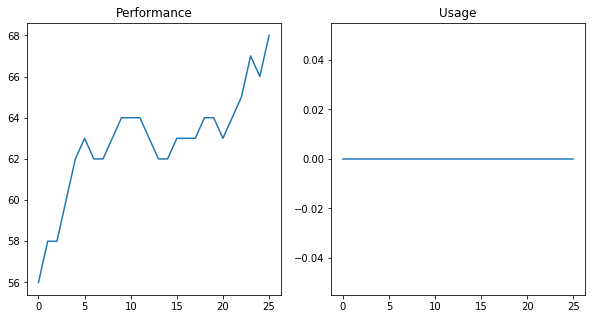

You are looking at Tracy's OnlyCholocateIceCream information


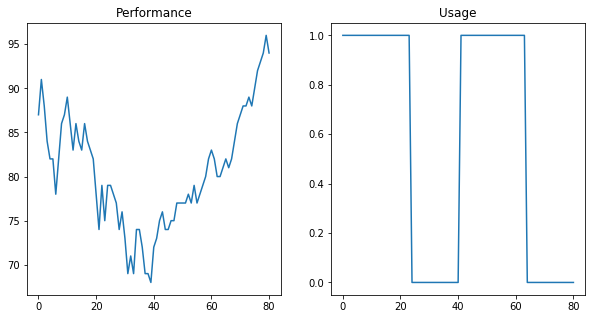

You are looking at Glooby's MartianOnly information


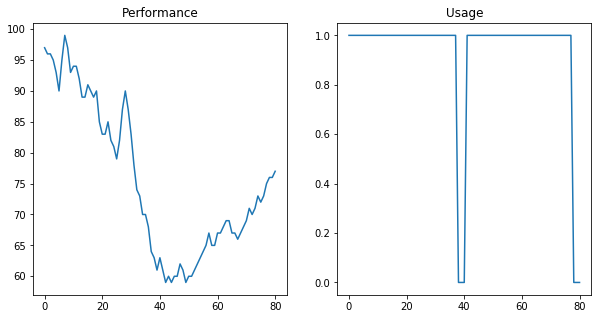

You are looking at Floppy's FlipCards information


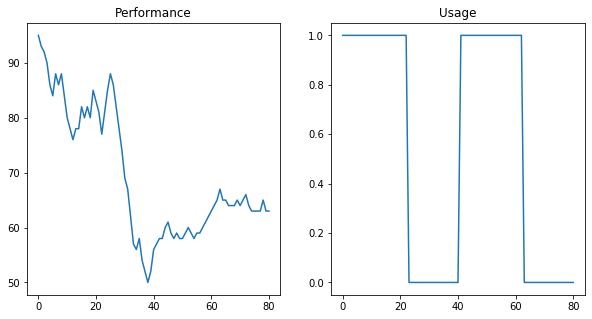

In [29]:
for manager in managers:
    obj = managers[manager]
    print(obj)
    obj.plot()

In [30]:
managers

{'Bobby': <__main__.ice_cream_maker at 0x10d0d2210>,
 'Tracy': <__main__.ice_cream_maker at 0x10d0d2750>,
 'Glooby': <__main__.ice_cream_maker at 0x10cc4e110>,
 'Floppy': <__main__.ice_cream_maker at 0x10d0d2d90>}

In [31]:
managers['Bobby'].performance = [1,2,3]

AttributeError: can't set attribute

In [32]:
managers['Tracy'].used = [1,2,3]

AttributeError: can't set attribute

In [33]:
ice_cream_maker(43, '')

ValueError: Manager property must be of type string and longer than length zero

In [34]:
ice_cream_maker('a string', '')

ValueError: Name property must be of type string and longer than length zero

Now, your `ice_cream_manager` class is more robust, it cannot be created with invalid entries, and it cannot have data accidently destroyed by careless use of public attributes.

# Exercises

#### Exercise 1: Construct two variables

Task: Create two lists, home and work, where A1 = [x1,y1] and A2 = [x2,y2].

In [ ]:
# your code goes here

#### Exercise 2: Find distance between home and work

Notice how A1 and A2 can be thought as points on a graph (x,y) coordinates

Task: Find the Euclidean distance squared between home and work.

To compute square root, use math.sqrt() method, which takes a non-negative float.

Hint: Euclidean distance is defined as √((x1-x2)^2 + (y1-y2)^2)

Hint: To compute the square, use x**2

In [ ]:
import math
import numpy as np

# your code goes here

#### Exercise 3: How far is home and work?

Not everyone bikes, so some of us need to walk. Now, can I walk from home to work?

Task: Create logic to know if you can work from home

If the distance is greater than 5, then walking isn't feasible.

If not, we can get our cardio in the morning. Let the world know of the distance and your action! (Print)

In [ ]:
# your code goes here

#### Exercise 4: How far do my coworkers live from work?

As part of our consulting journey, knowing our team mates makes an effective team. 

Sam, Ari and Alex live in different parts of town. Can they walk to work?

Unfortunately, you are not in the mood to do math, so you create a program to compute it for you.

Task: Create a function that takes two points and computes the distance between those two points. Name this function euclid

In [ ]:
# your code goes here

#### Exercise 5: Can my coworkers walk to work?

Now, can they work from home?

Task: Create a function that takes a distance and outputs whether or not my coworker can work from home.

This function takes two inputs: the distance and the person. Name this function action.

To ensure sanity amongst our peers, if the distance is 0, we need to let them know about the concept of home.

In [ ]:
# your code goes here

#### Exercise 6: Which coworker lives near me?

You come back to the office one day, and you realize that there are now 6 additional coworkers! 

Where have you been?

You started to become curious to see who lives near you.

Task: Create an object that will store the home location of each new person.

Hint: Create a list of people

Hint: Iterate over, and use int(math.random() * 21) to generate a number between 0 and 20

Hint: Remember to add Sam, Ari, Alex and yourself!

In [ ]:
# your code goes here

#### Exercise 7: Find which coworker lives the closest to you!

Task: Find the coworker who lives the closest to you.

In [ ]:
# your code goes here

#### Exercise 8: Moving projects and new co-workers

You have been assigned to a new project, and you have different coworkers. 

You want to do the same exercise as before, but you are exhausted of typing code all thee time.

Instead, you create a class, taking the project and and a list of people coordinates (each element needs to be ['name', loc])

When you print the class, it needs to print the name of the project and the number of people in it

Part 1: Create the class

Part 2: Create a method that finds the closest coworker

In [ ]:
# your code goes here